# Data and Plots for Competitive Adsorption Between Nitrogen and Hydrogen

In [163]:
import grand_canonical as gc
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [164]:
# Set global parameters
size = 4                            # size x size are the dimensions of the simulated lattice
n_steps = 10000                     # Number of steps for the simulation
mus_A = np.linspace(-0.2, 0, 7)     # Array of chemical potentials for hydrogen (eV)
Ts = np.linspace(0.001, 0.019, 7)   # Array of temperatures (K)

## Parameter set 1: Ideal mixture of nitrogen and hydrogen

In [165]:
# Set parameters
params_1 = []
for mu_A in mus_A:
    for T in Ts:
        params_1.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': 0,
            'epsilon_BB': 0,
            'epsilon_AB': 0,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

In [166]:
# Run the simulation
ps1_fl = np.zeros((len(mus_A), len(Ts), size, size))    # Initialize final lattice
mc1_A = np.zeros((len(mus_A), len(Ts))) # Initialize lattice for mean coverage of particle A
mc1_B = np.zeros((len(mus_A), len(Ts))) # Initialize lattice for mean coverage of particle B

for i, param in enumerate(params_1):
    lattice, coverage_A, coverage_B = gc.run_simulation(size, n_steps, param)
    ps1_fl[i // len(Ts), i % len(Ts)] = lattice
    mc1_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mc1_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

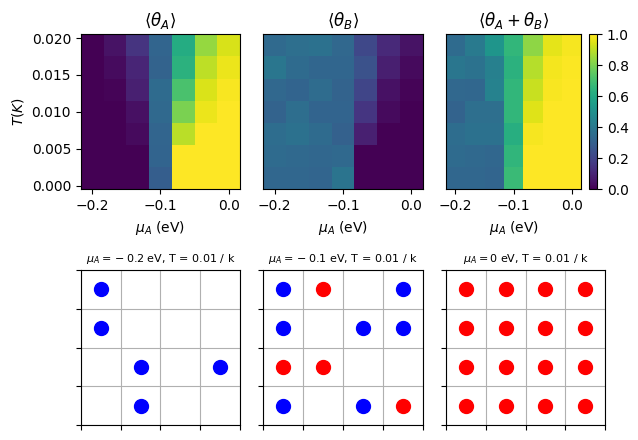

In [167]:
# Plot the phase diagrams and the lattice configuration

# Plot the T vs muA phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mc1_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_A \rangle$')
axs[0].set_xlabel(r'$\mu_A$ (eV)')
axs[0].set_ylabel(r'$T (K)$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mc1_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_B \rangle$')
axs[1].set_xlabel(r'$\mu_A$ (eV)')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mc1_A.T + mc1_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_A + \theta_B \rangle$')
axs[2].set_xlabel(r'$\mu_A$ (eV)')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)


# Plot the lattice configuration

# mu_A = -0.2 eV and T = 0.01 / k
axs[3] = gc.plot_lattice(ps1_fl[0, 3], axs[3], r'$\mu_A = -0.2$ eV, T = 0.01 / k')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = gc.plot_lattice(ps1_fl[3, 3], axs[4], r'$\mu_A = -0.1$ eV, T = 0.01 / k')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = gc.plot_lattice(ps1_fl[6, 3], axs[5], r'$\mu_A = 0$ eV, T = 0.01 / k')

plt.tight_layout()
plt.savefig('parameter_set_1.png')
plt.show()


## Parameter set 2: Repulsive interactions between nitrogen and hydrogen

In [168]:
#Set parameters
params_2 = []
for mu_A in mus_A:
    for T in Ts:
        params_2.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': 0.05,
            'epsilon_BB': 0.05,
            'epsilon_AB': 0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

In [169]:
#Run the simulation
ps2_fl = np.zeros((len(mus_A), len(Ts), size, size))    # Initialize final lattice
mc2_A = np.zeros((len(mus_A), len(Ts))) # Initialize lattice for mean coverage of particle A
mc2_B = np.zeros((len(mus_A), len(Ts))) # Initialize lattice for mean coverage of particle B

for i, param in enumerate(params_2):
    lattice, coverage_A, coverage_B = gc.run_simulation(size, n_steps, param)
    ps2_fl[i // len(Ts), i % len(Ts)] = lattice
    mc2_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mc2_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

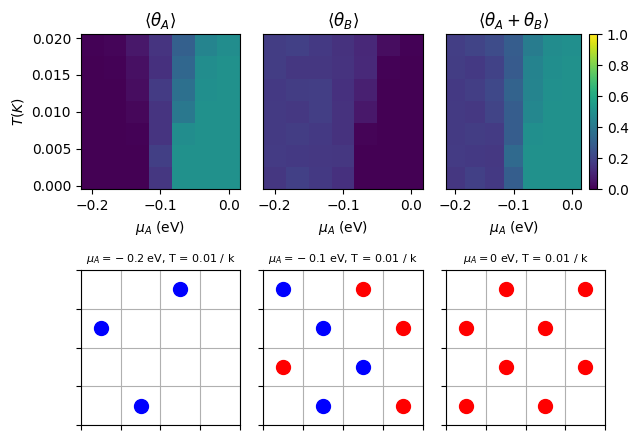

In [170]:
#Plot the phase diagrams and the lattice configuration

# Plot the T vs muA phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mc2_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_A \rangle$')
axs[0].set_xlabel(r'$\mu_A$ (eV)')
axs[0].set_ylabel(r'$T (K)$')

# Mean coverage of A
axs[1].pcolormesh(mus_A, Ts, mc2_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_B \rangle$')
axs[1].set_xlabel(r'$\mu_A$ (eV)')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mc2_A.T + mc2_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_A + \theta_B \rangle$')
axs[2].set_xlabel(r'$\mu_A$ (eV)')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)


# Plot the lattice configuration

axs[3] = gc.plot_lattice(ps2_fl[0, 3], axs[3], r'$\mu_A = -0.2$ eV, T = 0.01 / k')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = gc.plot_lattice(ps2_fl[3, 3], axs[4], r'$\mu_A = -0.1$ eV, T = 0.01 / k')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = gc.plot_lattice(ps2_fl[6, 3], axs[5], r'$\mu_A = 0$ eV, T = 0.01 / k')

plt.tight_layout()
plt.savefig('parameter_set_2.png')
plt.show()


## Parameter set 3: Attractive interactions between nitrogen and hydrogen

In [171]:
#Set parameters
params_3 = []
for mu_A in mus_A:
    for T in Ts:
        params_3.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': -0.05,
            'epsilon_BB': -0.05,
            'epsilon_AB': -0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

In [172]:
#Run the simulation

ps3_fl = np.zeros((len(mus_A), len(Ts), size, size))    #Initialize final lattice
mc3_A = np.zeros((len(mus_A), len(Ts))) #Initialize lattice for mean coverage of particle A
mc3_B = np.zeros((len(mus_A), len(Ts))) #Initialize lattice for mean coverage of particle B

for i, param in enumerate(params_3):
    lattice, coverage_A, coverage_B = gc.run_simulation(size, n_steps, param)
    ps3_fl[i // len(Ts), i % len(Ts)] = lattice
    mc3_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mc3_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

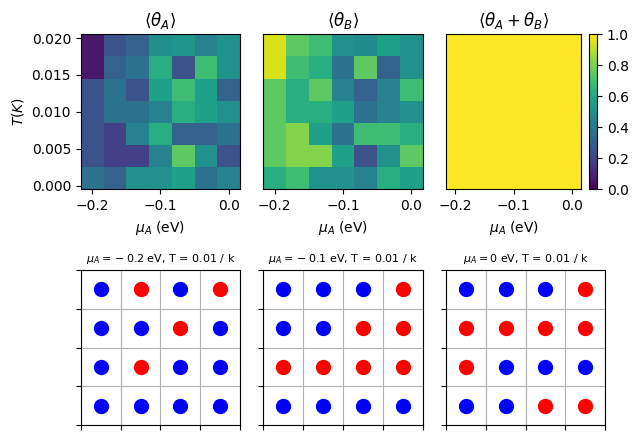

In [173]:
#Plot the phase diagrams and the lattice configuration

# Plot the T vs muA phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mc3_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_A \rangle$')
axs[0].set_xlabel(r'$\mu_A$ (eV)')
axs[0].set_ylabel(r'$T (K)$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mc3_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_B \rangle$')
axs[1].set_xlabel(r'$\mu_A$ (eV)')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mc3_A.T + mc3_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_A + \theta_B \rangle$')
axs[2].set_xlabel(r'$\mu_A$ (eV)')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)


# Plot the lattice configuration

axs[3] = gc.plot_lattice(ps3_fl[0, 3], axs[3], r'$\mu_A = -0.2$ eV, T = 0.01 / k')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = gc.plot_lattice(ps3_fl[3, 3], axs[4], r'$\mu_A = -0.1$ eV, T = 0.01 / k')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = gc.plot_lattice(ps3_fl[6, 3], axs[5], r'$\mu_A = 0$ eV, T = 0.01 / k')

plt.tight_layout()
plt.savefig('parameter_set_3.png')
plt.show()


## Parameter set 4: Immiscible nitrogen and hydrogen

In [174]:
#Set parameters
params_4 = []
for mu_A in mus_A:
    for T in Ts:
        params_4.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': -0.05,
            'epsilon_BB': -0.05,
            'epsilon_AB': 0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

In [175]:
#Run the simulation
ps4_fl = np.zeros((len(mus_A), len(Ts), size, size))    #Initialize final lattice
mc4_A = np.zeros((len(mus_A), len(Ts))) #Initialize lattice for mean coverage of particle A
mc4_B = np.zeros((len(mus_A), len(Ts))) #Initialize lattice for mean coverage of particle B

for i, param in enumerate(params_4):
    lattice, coverage_A, coverage_B = gc.run_simulation(size, n_steps, param)
    ps4_fl[i // len(Ts), i % len(Ts)] = lattice
    mc4_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mc4_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

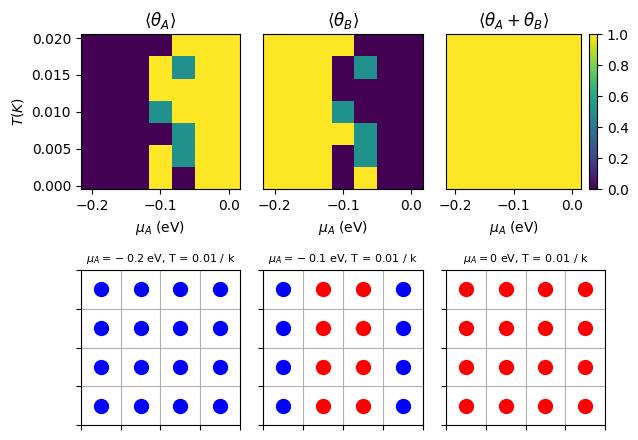

In [176]:
#Plot the phase diagrams and the lattice configuration

# Plot the T vs muA phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mc4_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_A \rangle$')
axs[0].set_xlabel(r'$\mu_A$ (eV)')
axs[0].set_ylabel(r'$T (K)$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mc4_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_B \rangle$')
axs[1].set_xlabel(r'$\mu_A$ (eV)')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mc4_A.T + mc4_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_A + \theta_B \rangle$')
axs[2].set_xlabel(r'$\mu_A$ (eV)')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)


# Plot the lattice configuration

axs[3] = gc.plot_lattice(ps4_fl[0, 3], axs[3], r'$\mu_A = -0.2$ eV, T = 0.01 / k')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = gc.plot_lattice(ps4_fl[3, 3], axs[4], r'$\mu_A = -0.1$ eV, T = 0.01 / k')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = gc.plot_lattice(ps4_fl[6, 3], axs[5], r'$\mu_A = 0$ eV, T = 0.01 / k')

plt.tight_layout()
plt.savefig('parameter_set_4.png')
plt.show()


## Parameter set 5: "Like dissolves unlike" scenario

In [177]:
#Set parameters
params_5 = []
for mu_A in mus_A:
    for T in Ts:
        params_5.append({
            'epsilon_A': -0.1,
            'epsilon_B': -0.1,
            'epsilon_AA': 0.05,
            'epsilon_BB': 0.05,
            'epsilon_AB': -0.05,
            'mu_A': mu_A,
            'mu_B': -0.1,
            'T': T  # Temperature (in units of k)
        })

In [178]:
#Run the simulation
ps5_fl = np.zeros((len(mus_A), len(Ts), size, size))    #Initialize final lattice
mc5_A = np.zeros((len(mus_A), len(Ts))) #Initialize lattice for mean coverage of particle A
mc5_B = np.zeros((len(mus_A), len(Ts))) #Initialize lattice for mean coverage of particle B

for i, param in enumerate(params_5):
    lattice, coverage_A, coverage_B = gc.run_simulation(size, n_steps, param)
    ps5_fl[i // len(Ts), i % len(Ts)] = lattice
    mc5_A[i // len(Ts), i % len(Ts)] = np.mean(coverage_A[-1000:])
    mc5_B[i // len(Ts), i % len(Ts)] = np.mean(coverage_B[-1000:])

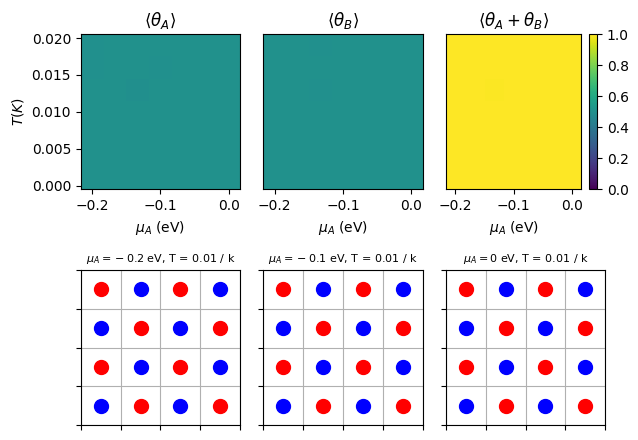

In [179]:
#Plot the phase diagrams and the lattice configuration

# Plot the T vs muA phase diagram
fig, axs = plt.subplot_mosaic([[0, 1, 2], [3, 4, 5]], figsize=(6.5, 4.5))

# Mean coverage of A
axs[0].pcolormesh(mus_A, Ts, mc5_A.T, cmap='viridis', vmin=0, vmax=1)
axs[0].set_title(r'$\langle \theta_A \rangle$')
axs[0].set_xlabel(r'$\mu_A$ (eV)')
axs[0].set_ylabel(r'$T (K)$')

# Mean coverage of B
axs[1].pcolormesh(mus_A, Ts, mc5_B.T, cmap='viridis', vmin=0, vmax=1)
axs[1].set_title(r'$\langle \theta_B \rangle$')
axs[1].set_xlabel(r'$\mu_A$ (eV)')
axs[1].set_yticks([])

# Mean total coverage
cax = axs[2].pcolormesh(mus_A, Ts, mc5_A.T + mc5_B.T, cmap='viridis', vmin=0, vmax=1)
axs[2].set_title(r'$\langle \theta_A + \theta_B \rangle$')
axs[2].set_xlabel(r'$\mu_A$ (eV)')
axs[2].set_yticks([])
fig.colorbar(cax, ax=axs[2], location='right', fraction=0.1)


# Plot the lattice configuration

axs[3] = gc.plot_lattice(ps5_fl[0, 3], axs[3], r'$\mu_A = -0.2$ eV, T = 0.01 / k')

# mu_A = -0.1 eV and T = 0.01 / k
axs[4] = gc.plot_lattice(ps5_fl[3, 3], axs[4], r'$\mu_A = -0.1$ eV, T = 0.01 / k')

# mu_A = 0 eV and T = 0.01 / k
axs[5] = gc.plot_lattice(ps5_fl[6, 3], axs[5], r'$\mu_A = 0$ eV, T = 0.01 / k')

plt.tight_layout()
plt.savefig('parameter_set_5.png')
plt.show()
